In [2]:
#import all the necessary packages here

import numpy as np

import csv

import pandas as pd

import warnings

import sklearn

import os

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

import statsmodels.api as sm
from scipy import stats

warnings.simplefilter('ignore')

In [4]:
#Change the directory to the folder where you have all the raw data

os.chdir(r"C:\Users\Shilp\Documents\Shilpa\Shilpa MSBA\Semester 1\Programming for Analytics [CIS 9650]\Final Group Project\Raw data\December 5")

In [92]:
columns = {'year': np.int64,
           'month': np.int64, 
           'monthly_variation': np.float64,
           'monthly_Uncertainity': np.float64,
           'annual_variation': np.float64,
           'annual_Uncertainity': np.float64,
           'five_year_variation': np.float64,
           'five_year_Uncertainity': np.float64,
           'ten_year_variation': np.float64,
           'ten_year_Uncertainity': np.float64
}

In [396]:
#Load the global and US datasets containing average temperature from 1820 to provide evidence for climate change
# Datasource: (Global) http://berkeleyearth.lbl.gov/auto/Global/Complete_TAVG_complete.txt
# Datasource: (US) http://berkeleyearth.lbl.gov/auto/Regional/TAVG/Text/united-states-TAVG-Trend.txt
# Datasource: (NA) http://berkeleyearth.lbl.gov/auto/Regional/TAVG/Text/united-states-TAVG-Trend.txt

global_avg_temp = pd.read_csv('global-land-TAVG-Trend.txt', delim_whitespace=True, comment = '%',header=None)
US_avg_temp = pd.read_csv('united-states-TAVG-Trend.txt', delim_whitespace=True,  comment = '%',header=None)
NA_avg_temp = pd.read_csv('north-america-TAVG-Trend.txt', delim_whitespace=True,  comment = '%',header=None)

In [397]:
# Understand the data
#For each month, the report contains the estimated land-surface anomaly for that month and its uncertainty
# Estimated Jan 1951-Dec 1980 absolute temperature (C): 8.61 +/- 0.09
# Estimated Jan 1951-Dec 1980 monthly absolute temperature (C):
#       Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct    Nov    Dec
#       2.61   3.22   5.30   8.30  11.30  13.44  14.31  13.84  12.05   9.21   6.07   3.64
#  +/-   0.11   0.10   0.09   0.09   0.09   0.10   0.11   0.10   0.09   0.09   0.10   0.11

#Uncertainties represent the 95% confidence interval for statistical noise and spatial undersampling effects. Such uncertainties
#are expected to account for the effects of random noise as well as random biases affecting station trends and random shifts 
#in station baselines

global_avg_temp.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1750,1,-0.546,3.191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1750,2,-0.935,3.098,-0.865,1.078,NaN,NaN,NaN,NaN,NaN,NaN
2,1750,3,0.431,2.418,-0.889,1.103,NaN,NaN,NaN,NaN,NaN,NaN
3,1750,4,-0.183,1.449,-0.923,1.113,NaN,NaN,NaN,NaN,NaN,NaN
4,1750,5,-1.536,1.374,-1.236,1.148,NaN,NaN,NaN,NaN,NaN,NaN


In [398]:
#Setting column names to the global temp avg dataset
global_avg_temp.columns = ['year', 'month','monthly_variation','monthly_Uncertainity','annual_variation','annual_Uncertainity',
                           'five_year_variation','five_year_Uncertainity','ten_year_variation','ten_year_Uncertainity',
                           'twenty_year_variation','twenty_year_Uncertainity']

In [399]:
# Verifying that the dataset is accurate
global_avg_temp.head()

,year,month,monthly_variation,monthly_Uncertainity,annual_variation,annual_Uncertainity,five_year_variation,five_year_Uncertainity,ten_year_variation,ten_year_Uncertainity,twenty_year_variation,twenty_year_Uncertainity
0,1750,1,-0.546,3.191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1750,2,-0.935,3.098,-0.865,1.078,NaN,NaN,NaN,NaN,NaN,NaN
2,1750,3,0.431,2.418,-0.889,1.103,NaN,NaN,NaN,NaN,NaN,NaN
3,1750,4,-0.183,1.449,-0.923,1.113,NaN,NaN,NaN,NaN,NaN,NaN
4,1750,5,-1.536,1.374,-1.236,1.148,NaN,NaN,NaN,NaN,NaN,NaN


In [400]:
global_avg_temp_filter = global_avg_temp[global_avg_temp.year >= 1820]
global_avg_temp_filter.head()

,year,month,monthly_variation,monthly_Uncertainity,annual_variation,annual_Uncertainity,five_year_variation,five_year_Uncertainity,ten_year_variation,ten_year_Uncertainity,twenty_year_variation,twenty_year_Uncertainity
840,1820,1,-2.923,2.345,-0.792,0.606,-0.842,0.387,-0.955,0.379,-0.890,0.366
841,1820,2,-0.678,1.950,-0.821,0.594,-0.845,0.385,-0.951,0.402,-0.883,0.358
842,1820,3,-0.610,1.792,-0.819,0.546,-0.810,0.388,-0.941,0.394,-0.885,0.358
843,1820,4,0.901,1.424,-0.916,0.529,-0.787,0.393,-0.921,0.398,-0.878,0.355
844,1820,5,0.222,1.040,-0.970,0.517,-0.794,0.389,-0.912,0.399,-0.874,0.352


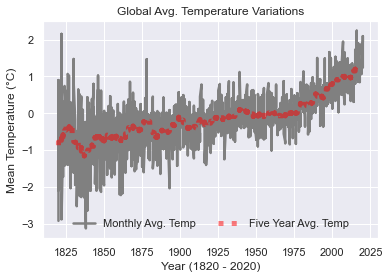

In [401]:
# Plot a line graph to understand temperature variations over 200 years globally

from pylab import *

plt.title('Global Avg. Temperature Variations')
plt.xlabel('Year (1820 - 2020)')
plt.ylabel('Mean Temperature (°C)')
plot(global_avg_temp_filter[['year']],global_avg_temp_filter[['monthly_variation']], color='grey', linewidth=2.5, linestyle='-', label='Monthly Avg. Temp')
legend(frameon=False, loc='lower center', ncol=2)
plot(global_avg_temp_filter[['year']],global_avg_temp_filter[['five_year_variation']], color='red', linewidth=5, alpha=0.5, linestyle=':', label='Five Year Avg. Temp')
legend(frameon=False, loc='lower center', ncol=2)

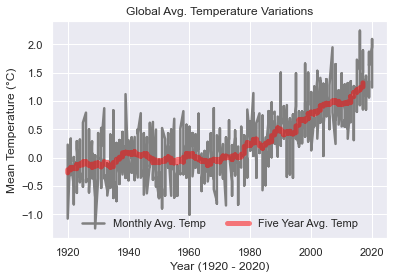

In [402]:
# Let's zoom in to understand the trend in the last century 

global_avg_temp_filter2 = global_avg_temp[global_avg_temp.year >= 1920]
plt.title('Global Avg. Temperature Variations')
plt.xlabel('Year (1920 - 2020)')
plt.ylabel('Mean Temperature (°C)')
plot(global_avg_temp_filter2[['year']],global_avg_temp_filter2[['monthly_variation']], color='grey', linewidth=2.5, linestyle='-', label='Monthly Avg. Temp')
legend(frameon=False, loc='lower center', ncol=2)
plot(global_avg_temp_filter2[['year']],global_avg_temp_filter2[['five_year_variation']], color='red', linewidth=5, alpha=0.5, linestyle='-', label='Five Year Avg. Temp')
legend(frameon=False, loc='lower center', ncol=2)

In [403]:
# Understand the data
#For each month, the report contains the estimated land-surface anomaly for that month and its uncertainty
#  Estimated Jan 1951-Dec 1980 absolute temperature (C): 2.23 +/- 0.18
# Estimated Jan 1951-Dec 1980 monthly absolute temperature (C):
#       Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct    Nov    Dec
#     -11.90  -9.80  -5.84   0.98   8.05  13.45  16.23  15.04  10.24   3.67  -3.76  -9.65
# +/-   0.20   0.20   0.19   0.19   0.19   0.19   0.20   0.20   0.19   0.19   0.19   0.19

#Uncertainties represent the 95% confidence interval for statistical noise and spatial undersampling effects. Such uncertainties
#are expected to account for the effects of random noise as well as random biases affecting station trends and random shifts 
#in station baselines


NA_avg_temp.columns = ['year', 'month','monthly_variation','monthly_Uncertainity','annual_variation','annual_Uncertainity',
                           'five_year_variation','five_year_Uncertainity','ten_year_variation','ten_year_Uncertainity',
                           'twenty_year_variation','twenty_year_Uncertainity']
NA_avg_temp.head()

,year,month,monthly_variation,monthly_Uncertainity,annual_variation,annual_Uncertainity,five_year_variation,five_year_Uncertainity,ten_year_variation,ten_year_Uncertainity,twenty_year_variation,twenty_year_Uncertainity
0,1823,10,-2.037,1.532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1823,11,-1.567,2.294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1823,12,-1.607,2.035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1824,1,1.238,2.137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1824,2,-1.551,2.079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


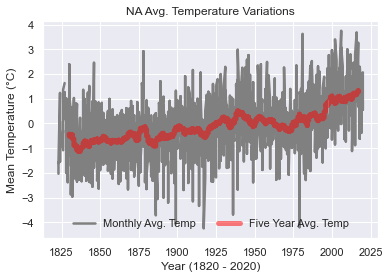

In [404]:
# Plot a line graph to understand temperature variations over 200 years in NA

NA_avg_temp_filter = NA_avg_temp[NA_avg_temp.year >= 1820]
plt.title('NA Avg. Temperature Variations')
plt.xlabel('Year (1820 - 2020)')
plt.ylabel('Mean Temperature (°C)')
plot(NA_avg_temp_filter[['year']],NA_avg_temp_filter[['monthly_variation']], color='grey', linewidth=2.5, linestyle='-', label='Monthly Avg. Temp')
legend(frameon=False, loc='lower center', ncol=2)
plot(NA_avg_temp_filter[['year']],NA_avg_temp_filter[['five_year_variation']], color='red', linewidth=5, alpha=0.5, linestyle='-', label='Five Year Avg. Temp')
legend(frameon=False, loc='lower center', ncol=2)

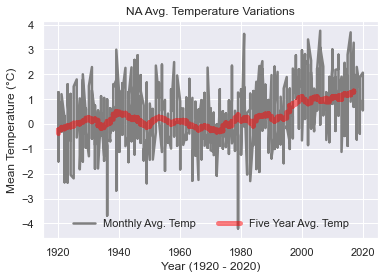

In [405]:
# Plot a line graph to understand temperature variations over 100 years in NA

NA_avg_temp_filter2 = NA_avg_temp[NA_avg_temp.year >= 1920]
plt.title('NA Avg. Temperature Variations')
plt.xlabel('Year (1920 - 2020)')
plt.ylabel('Mean Temperature (°C)')
plot(NA_avg_temp_filter2[['year']],NA_avg_temp_filter2[['monthly_variation']], color='grey', linewidth=2.5, linestyle='-', label='Monthly Avg. Temp')
legend(frameon=False, loc='lower center', ncol=2)
plot(NA_avg_temp_filter2[['year']],NA_avg_temp_filter2[['five_year_variation']], color='red', linewidth=5, alpha=0.5, linestyle='-', label='Five Year Avg. Temp')
legend(frameon=False, loc='lower center', ncol=2)

In [406]:
NA_avg_temp_filter['quintile'] = pd.qcut(NA_avg_temp_filter['year'], q=10)

In [407]:
NA_avg_temp_group = NA_avg_temp_filter.groupby(['quintile']).mean()[["monthly_variation","monthly_Uncertainity"]].reset_index()

In [408]:
NA_avg_temp_group

,quintile,monthly_variation,monthly_Uncertainity
0,"(1822.999, 1843.0]",-0.683749,1.641277
1,"(1843.0, 1863.0]",-0.711397,1.296983
2,"(1863.0, 1882.0]",-0.458605,0.975557
3,"(1882.0, 1902.0]",-0.513117,0.597629
4,"(1902.0, 1922.0]",-0.330092,0.432346
5,"(1922.0, 1941.0]",0.119123,0.281961
6,"(1941.0, 1961.0]",0.130967,0.198958
7,"(1961.0, 1981.0]",-0.015783,0.211325
8,"(1981.0, 2000.0]",0.354175,0.168382
9,"(2000.0, 2020.0]",1.061859,0.167060


In [409]:
#Load the global and US datasets containing maximum temperature from 1820 to provide evidence for climate change
# Datasource: (NA) http://berkeleyearth.lbl.gov/auto/Regional/TMAX/Text/north-america-TMAX-Trend.txt

NA_max_temp = pd.read_csv('north-america-TMAX-Trend.txt', delim_whitespace=True,  comment = '%',header=None)

In [410]:
NA_max_temp.columns = ['year', 'month','monthly_variation','monthly_Uncertainity','annual_variation','annual_Uncertainity',
                           'five_year_variation','five_year_Uncertainity','ten_year_variation','ten_year_Uncertainity',
                           'twenty_year_variation','twenty_year_Uncertainity']
NA_max_temp.head()

,year,month,monthly_variation,monthly_Uncertainity,annual_variation,annual_Uncertainity,five_year_variation,five_year_Uncertainity,ten_year_variation,ten_year_Uncertainity,twenty_year_variation,twenty_year_Uncertainity
0,1870,7,0.504,1.502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1870,8,-0.480,1.428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1870,9,-0.224,1.115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1870,10,-0.894,1.447,0.165,0.788,NaN,NaN,NaN,NaN,NaN,NaN
4,1870,11,1.367,1.512,0.091,0.828,NaN,NaN,NaN,NaN,NaN,NaN


In [411]:
NA_max_temp_filter = NA_max_temp[NA_max_temp.columns[0:3]]

In [412]:
top10_tmax =NA_max_temp_filter.sort_values(['month','monthly_variation'],ascending=[True,False]).groupby('month').head(10)
top10_tmax = top10_tmax.reset_index()

In [413]:
pivot_top10_tmax = top10_tmax.pivot(columns='month', values='year').reset_index()

In [414]:
tmax_year = pivot_top10_tmax.apply(lambda x: pd.Series(x.dropna().values)).head(10)
tmax_year['rank'] = tmax_year['index']+1
del tmax_year['index']
tmax_year.columns = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','rank']
tmax_year

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,rank
0,2006.0,2017.0,2016.0,2010.0,1998.0,2016.0,2012.0,2012.0,2012.0,1963.0,2016.0,2002.0,1
1,1981.0,2000.0,2010.0,2006.0,2018.0,2012.0,1936.0,2011.0,1998.0,1947.0,1999.0,2006.0,2
2,2016.0,2016.0,1878.0,1998.0,2006.0,2013.0,2016.0,2010.0,2011.0,2003.0,2009.0,1939.0,3
3,2017.0,2012.0,2000.0,1915.0,2012.0,2006.0,2018.0,2003.0,2015.0,1938.0,1949.0,2015.0,4
4,2014.0,1954.0,1946.0,2012.0,2016.0,2015.0,1998.0,2016.0,2009.0,2010.0,1878.0,2001.0,5
5,2001.0,1991.0,1945.0,2005.0,2017.0,1900.0,2017.0,2001.0,2017.0,2017.0,1981.0,2011.0,6
6,2003.0,1977.0,2012.0,1977.0,1934.0,2002.0,2006.0,1998.0,2001.0,2014.0,2010.0,2018.0,7
7,2012.0,1999.0,1981.0,2016.0,2001.0,2017.0,2007.0,2013.0,1938.0,2015.0,2001.0,2003.0,8
8,1987.0,1998.0,1910.0,1895.0,1958.0,1994.0,2003.0,2017.0,2016.0,2016.0,2015.0,2017.0,9
9,1942.0,2005.0,1889.0,1987.0,2003.0,1988.0,2011.0,1878.0,1940.0,1931.0,1954.0,2005.0,10


In [415]:
#Load the global and US datasets containing minimum temperature from 1820 to provide evidence for climate change
# Datasource: (NA) http://berkeleyearth.lbl.gov/auto/Regional/TMIN/Text/contiguous-united-states-TMIN-Trend.txt

NA_min_temp = pd.read_csv('north-america-TMIN-Trend.txt', delim_whitespace=True,  comment = '%',header=None)
NA_min_temp.columns = ['year', 'month','monthly_variation','monthly_Uncertainity','annual_variation','annual_Uncertainity',
                           'five_year_variation','five_year_Uncertainity','ten_year_variation','ten_year_Uncertainity',
                           'twenty_year_variation','twenty_year_Uncertainity']
NA_min_temp.head()

,year,month,monthly_variation,monthly_Uncertainity,annual_variation,annual_Uncertainity,five_year_variation,five_year_Uncertainity,ten_year_variation,ten_year_Uncertainity,twenty_year_variation,twenty_year_Uncertainity
0,1869,7,-0.329,1.420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1869,8,-0.018,1.525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1869,9,-0.335,1.516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1869,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1869,11,-1.073,2.302,-0.465,0.758,NaN,NaN,NaN,NaN,NaN,NaN


In [416]:
NA_min_temp_filter = NA_min_temp[NA_min_temp.columns[0:3]]
top10_tmin =NA_min_temp_filter.sort_values(['month','monthly_variation'],ascending=[True,True]).groupby('month').head(10)
top10_tmin = top10_tmin.reset_index()
pivot_top10_tmin = top10_tmin.pivot(columns='month', values='year').reset_index()
tmin_year = pivot_top10_tmin.apply(lambda x: pd.Series(x.dropna().values)).head(10)
tmin_year['rank'] = tmin_year['index']+1


In [417]:
del tmin_year['index']
tmin_year.columns = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','rank']
tmin_year

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,rank
0,1886.0,1979.0,1875.0,1907.0,1907.0,1917.0,1918.0,1890.0,1873.0,1917.0,1880.0,1917.0,1
1,1887.0,1899.0,1964.0,1909.0,1917.0,1915.0,1891.0,1917.0,1918.0,1873.0,1875.0,1871.0,2
2,1884.0,1936.0,1880.0,1874.0,1888.0,1907.0,1883.0,1887.0,1974.0,1887.0,1898.0,1879.0,3
3,1875.0,1910.0,1923.0,1880.0,1983.0,1875.0,1912.0,1883.0,1956.0,1895.0,1871.0,1872.0,4
4,1888.0,1914.0,1899.0,1928.0,1945.0,1877.0,1913.0,1880.0,1965.0,1891.0,1932.0,1880.0,5
5,1925.0,1887.0,1888.0,1887.0,1891.0,1902.0,1884.0,1950.0,1871.0,1884.0,1872.0,1887.0,6
6,1918.0,1891.0,1887.0,1920.0,1918.0,1916.0,1904.0,1884.0,1883.0,1898.0,1883.0,1916.0,7
7,1982.0,1894.0,1896.0,1893.0,1890.0,1945.0,1924.0,1927.0,1903.0,1925.0,1955.0,1933.0,8
8,1909.0,1904.0,1960.0,1918.0,1875.0,1918.0,1915.0,1879.0,1904.0,1876.0,1874.0,1924.0,9
9,1883.0,1884.0,1890.0,1972.0,1884.0,1929.0,1895.0,1907.0,1879.0,1893.0,1896.0,1983.0,10


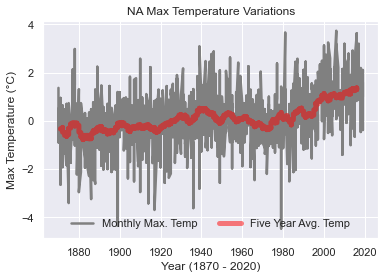

In [418]:
# Plot a line graph to understand tmax variations over 200 years in NA

NA_max_temp_plot = NA_max_temp[NA_max_temp.year >= 1820]
plt.title('NA Max Temperature Variations')
plt.xlabel('Year (1870 - 2020)')
plt.ylabel('Max Temperature (°C)')
plot(NA_max_temp_plot[['year']],NA_max_temp_plot[['monthly_variation']], color='grey', linewidth=2.5, linestyle='-', label='Monthly Max. Temp')
legend(frameon=False, loc='lower center', ncol=2)
plot(NA_max_temp_plot[['year']],NA_max_temp_plot[['five_year_variation']], color='red', linewidth=5, alpha=0.5, linestyle='-', label='Five Year Avg. Temp')
legend(frameon=False, loc='lower center', ncol=2)

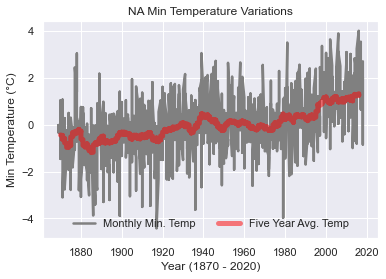

In [419]:
NA_min_temp_plot = NA_min_temp[NA_min_temp.year >= 1820]
plt.title('NA Min Temperature Variations')
plt.xlabel('Year (1870 - 2020)')
plt.ylabel('Min Temperature (°C)')
plot(NA_min_temp_plot[['year']],NA_min_temp_plot[['monthly_variation']], color='grey', linewidth=2.5, linestyle='-', label='Monthly Min. Temp')
legend(frameon=False, loc='lower center', ncol=2)
plot(NA_min_temp_plot[['year']],NA_min_temp_plot[['five_year_variation']], color='red', linewidth=5, alpha=0.5, linestyle='-', label='Five Year Avg. Temp')
legend(frameon=False, loc='lower center', ncol=2)